In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
class ForwardBackward:
    def __init__(self):
        self.x = np.linspace(0, 1, 101)
        self.rho0 = np.zeros_like(self.x)
        self.rho0[20: 30] = 1
        
        self.h = 0.01
        self.v = 0.5
        self.dx = self.x[1] - self.x[0]
        
        self.rho1 = np.copy(self.rho0) # rho in time n
        self.rho2 = np.copy(self.rho0) # rho in time n + 1
        
    def plot(self):
        plt.plot(self.x, self.rho1)
        plt.show()
        time.sleep(0.1)
        clear_output()
        
    def ftfs(self, step=1000):
        for i in range(step):
            self.rho2[:-1] = self.rho1[:-1] - self.h * self.v / self.dx * (self.rho1[1:] - self.rho1[:-1]) 
            # self.rho2[-1] = self.rho1[-1] - self.h * self.v / self.dx * (self.rho1[-1] - self.rho1[-2])
            
            self.rho1 = self.rho2
            
            self.plot()
                
    def ftbs(self, step=1000):
        for i in range(step):
            self.rho2[1:] = self.rho1[1:] - self.h * self.v / self.dx * (self.rho1[1:] - self.rho1[:-1]) 
            
            self.rho1 = self.rho2
            self.plot()

In [ ]:
ForwardBackward().ftbs()

In [3]:
class Lax(ForwardBackward):
    def __init__(self):
        super(Lax, self).__init__()
        
    def evolve(self, step=1000):
        for i in range(step):
            self.rho2[1:-1] = self.rho1[1:-1] - (self.v * self.h / 2 / self.dx) * (self.rho1[2:] - self.rho1[0:-2]) \
                + (self.v**2 * self.h**2 / 2 / self.dx**2) * (self.rho1[2:] - 2 * self.rho1[1:-1] + self.rho1[0:-2])
            
            self.rho1 = self.rho2
            self.plot()

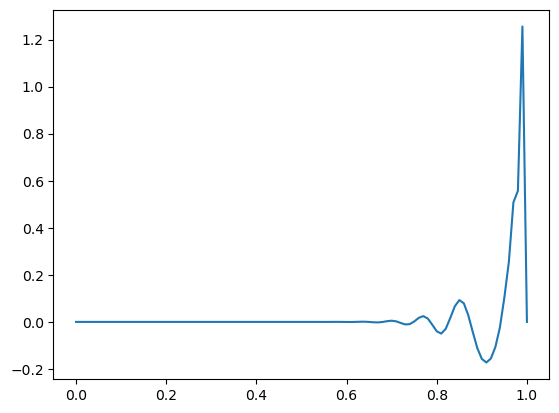

In [ ]:
Lax().evolve()